In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box, Point
import numpy as np

In [106]:
df = pd.read_csv(
    "data/processed/bearing/ais_cleaned.csv",
    dtype={"MMSI": str},
    low_memory=False
)
print(f"📥  Ursprüngliche AIS-Meldungen geladen: {len(df):,}")

📥  Ursprüngliche AIS-Meldungen geladen: 2,039,215


In [107]:
df_inter = pd.read_csv(
    "data/processed/bearing/ais_interpolated.csv",
    dtype={"MMSI": str},
    low_memory=False
)
print(f"📥  Ursprüngliche AIS-Meldungen geladen: {len(df_inter):,}")

📥  Ursprüngliche AIS-Meldungen geladen: 977,539


In [139]:
df_inter = pd.read_csv(
    "data/processed/bearing/ais_with_distance.csv",
    dtype={"MMSI": str},
    low_memory=False
)
print(f"📥  Ursprüngliche AIS-Meldungen geladen: {len(df_inter):,}")

📥  Ursprüngliche AIS-Meldungen geladen: 977,539


In [140]:
df_inter

,# Timestamp,MMSI,Latitude,Longitude,Destination,bearing,bearing_rate,dist_m
0,2022-10-01 00:00:20,229344000,54.530143,11.356242,LTKLJ,141.098699,0.000000,6930.459417
1,2022-10-01 00:00:40,229344000,54.529653,11.357865,LTKLJ,140.711241,-0.019373,7039.053050
2,2022-10-01 00:01:00,229344000,54.529249,11.359166,LTKLJ,140.414996,-0.014812,7127.190917
3,2022-10-01 00:01:20,229344000,54.528824,11.360489,LTKLJ,140.129870,-0.014256,7218.308615
4,2022-10-01 00:01:40,229344000,54.528394,11.361816,LTKLJ,139.852954,-0.013846,7310.139577
...,...,...,...,...,...,...,...,...
977534,2022-10-31 23:58:18,232031538,54.523757,11.425563,FRURO,124.593544,0.003647,10740.307196
977535,2022-10-31 23:58:38,232031538,54.524222,11.424030,FRURO,124.668957,0.003771,10629.229467
977536,2022-10-31 23:58:58,232031538,54.524740,11.422343,FRURO,124.750456,0.004075,10506.631456
977537,2022-10-31 23:59:18,232031538,54.525230,11.420743,FRURO,124.829905,0.003972,10390.426851


In [131]:
df_sector = pd.read_csv(
    "data/processed/bearing/sector_histogram.csv")
print(f"📥  Ursprüngliche AIS-Meldungen geladen: {len(df_sector):,}")

📥  Ursprüngliche AIS-Meldungen geladen: 72


In [132]:
df_sector

,bearing_deg,2500.0,7500.0,12500.0,17500.0,22500.0,27500.0
0,2.5,0.000076,0.000077,0.0,0.0,0.0,0.0
1,7.5,0.000101,0.000048,0.0,0.0,0.0,0.0
2,12.5,0.000118,0.000052,0.0,0.0,0.0,0.0
3,17.5,0.000114,0.000054,0.0,0.0,0.0,0.0
4,22.5,0.000116,0.001251,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
67,337.5,0.000033,0.000244,0.0,0.0,0.0,0.0
68,342.5,0.000027,0.000205,0.0,0.0,0.0,0.0
69,347.5,0.000036,0.000161,0.0,0.0,0.0,0.0
70,352.5,0.000050,0.000128,0.0,0.0,0.0,0.0


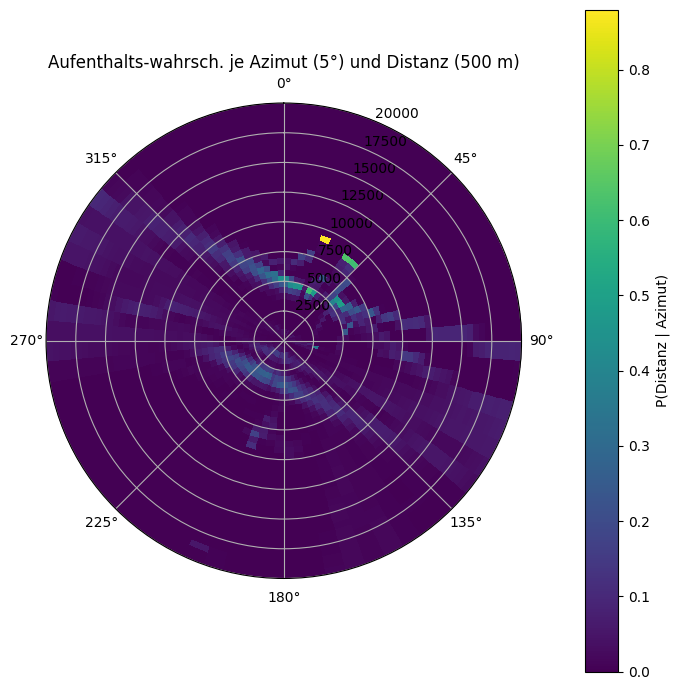

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

csv_path = Path("data/processed/bearing/sector_histogram.csv")

hist_df = pd.read_csv(csv_path, index_col=0)

theta = np.deg2rad(hist_df.index.astype(float).values)
r     = hist_df.columns.astype(float).values
T, R  = np.meshgrid(theta, r, indexing="ij")

fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection="polar")

pcm = ax.pcolormesh(T, R, hist_df.values, shading="auto")  # default colormap
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Aufenthalts­wahrsch. je Azimut (5°) und Distanz (500 m)")
cbar = plt.colorbar(pcm, ax=ax, pad=0.1)
cbar.set_label("P(Distanz | Azimut)")

plt.tight_layout()
plt.show()

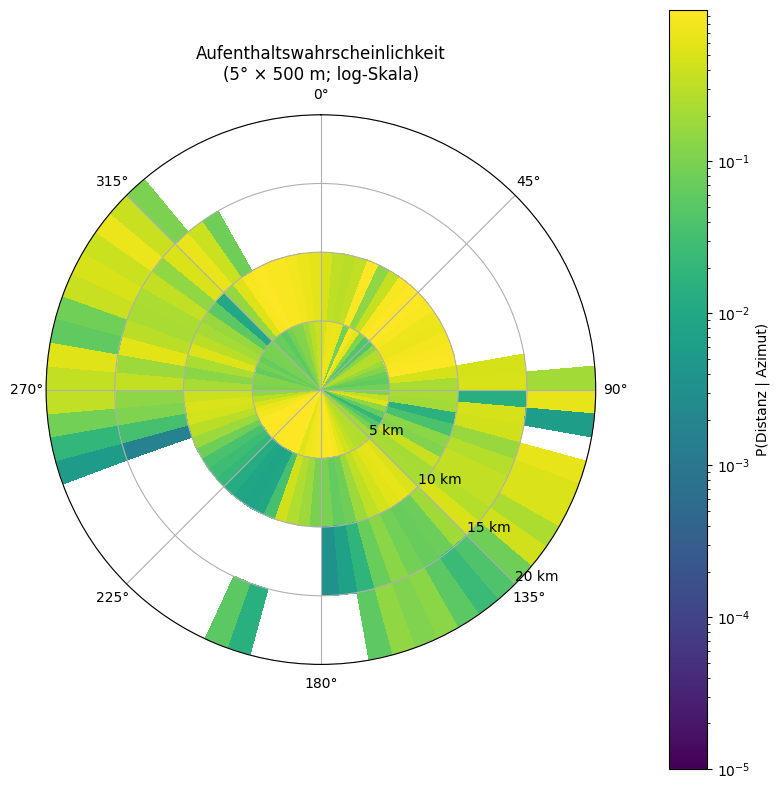

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path

# --- Datei laden -------------------------------------------------------
csv_path = Path("data/processed/bearing/sector_histogram.csv")
hist_df  = pd.read_csv(csv_path, index_col=0)

theta = np.deg2rad(hist_df.index.astype(float).values)   # Azimut-Mitten
r     = hist_df.columns.astype(float).values             # Radius-Mitten (m)
T, R  = np.meshgrid(theta, r, indexing="ij")

# --- Plot --------------------------------------------------------------
fig = plt.figure(figsize=(8, 8))
ax  = fig.add_subplot(111, projection="polar")

pcm = ax.pcolormesh(
    T, R, hist_df.values,
    shading="nearest",         # glattere Darstellung
    cmap="viridis",
    norm=LogNorm(vmin=1e-5, vmax=hist_df.values.max())   # Log-Skala
)

# Achsen & Gitter
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

ax.set_rlim(0, 20_000)                    # 0–20 km
ax.set_rlabel_position(135)               # Radius-Labels nach links
ax.set_rticks(np.arange(0, 20_001, 5_000))
ax.set_rgrids(np.arange(5_000, 20_001, 5_000),
              labels=[f"{r/1000:.0f} km" for r in np.arange(5_000, 20_001, 5_000)],
              angle=135)

ax.set_thetagrids(np.arange(0, 360, 45))  # 0,45,90° …

# Titel & Farbleiste
ax.set_title("Aufenthaltswahrscheinlichkeit\n(5° × 500 m; log-Skala)")
cbar = plt.colorbar(pcm, ax=ax, pad=0.1)
cbar.set_label("P(Distanz | Azimut)")

plt.tight_layout()
plt.show()